**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

# **Random forests Algorithm**



[**Random forest**](https://www.ibm.com/topics/random-forest?mhsrc=ibmsearch_a&mhq=decision%20tree%20cart%20algorithm) Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

#### **Task:**   This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

### **Dataset available on:** [UCI Machine Learning Glass Identification](https://archive.ics.uci.edu/dataset/42/glass+identification)   [kaggle](https://www.kaggle.com/datasets/uciml/glass)

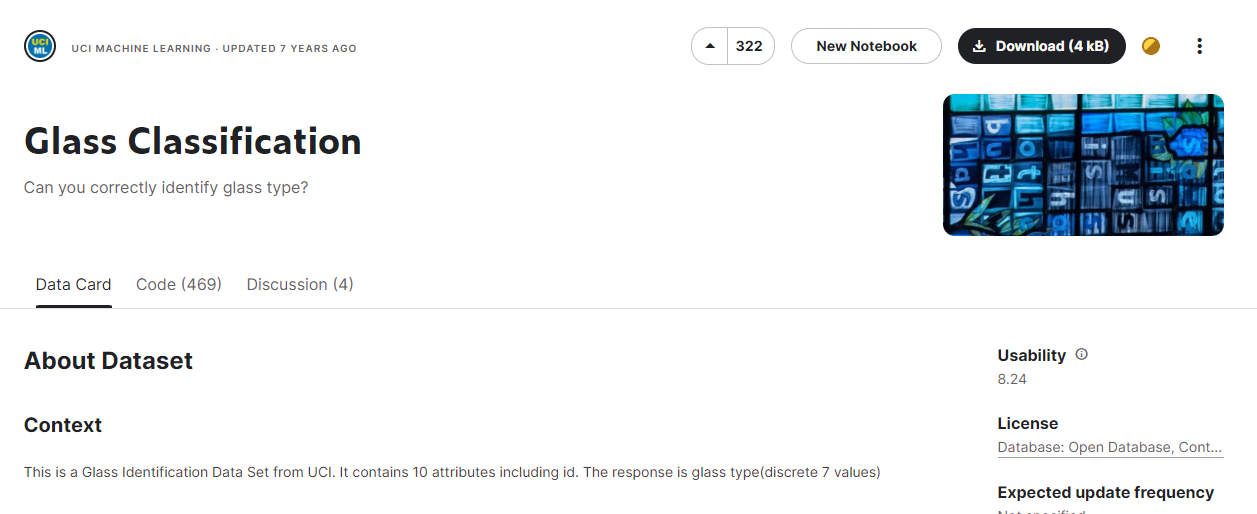

### **Imports**

In [ ]:
# import all the necessary library needed
import numpy as np # for scientific computing
import matplotlib.pyplot as plt # for visualisation purposes
import pandas as pd # for wrangling
# the dataset and the classifier algorithm
from sklearn.ensemble import RandomForestClassifier # the randomForestClassifier
from sklearn.model_selection import train_test_split # for splitting the dataset
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # for outputting a summary report of accuracy, precision and recall
# suppress warning messages
import warnings
warnings.filterwarnings("ignore")

### **The dataset**

In [ ]:
# read the data using pandas
glass_dataset = pd.read_csv('/content/glass.csv')

#### **Basic Exploratory data Analysis**

In [ ]:
# display the first five rows using the head function
glass_dataset.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# show the column names
glass_dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
# shape of the data
glass_dataset.shape

(214, 10)

In [ ]:
# check for missing values
glass_dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
# check data types
glass_dataset.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
# create a copy of the dataset for visualization purpose
df_glass = glass_dataset.copy()
df_glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
# show the distribution of the data
df_glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

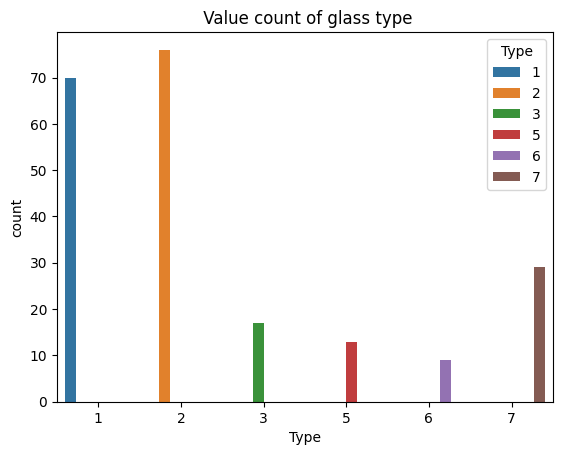

In [ ]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=df_glass, x='Type', hue='Type').set(title = " Value count of glass type");

#### **Creat input/dependent and target/dependent variables:**

In [ ]:
# assign the dependent variable/target
y = df_glass['Type']
# drop the target variable from the rest of the dataset
df_glass.drop('Type', axis = 1, inplace = True)
# create a copy of the dataset
x = df_glass.copy()

In [ ]:
#check the target by calling the head
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [ ]:
#check the inputs by calling the head
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


#### **Create a training and a testing dataset:**

In [ ]:
# this function takes in the dataset and train_split the values
def split_data(x, y):

    # train_test split
    x_train, x_test, y_train, y_test = train_test_split(x, # independent or x values
                                                    y, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 42, # for reproducibility
                                                    stratify = y   # get a balance both in the training and test set
                                                      )

    return x_train, x_test, y_train, y_test

In [ ]:
# run the train test split function
x_train, x_test, y_train, y_test = split_data(x, y)

#### **Check the result from the stratification**

In [ ]:
#get training shape
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (171, 9)
Training Label Rows 171


In [ ]:
#get testing shape
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (43, 9)
Testing Label Rows 43


In [ ]:
#check class distribution
print( x_train.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))


RI       Na     Mg    Al    Si     K     Ca     Ba    Fe  
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00    0.011696
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00    0.005848
1.51829  14.46  2.24  1.62  72.38  0.00  9.26   0.00  0.00    0.005848
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00    0.005848
1.51837  13.14  2.84  1.28  72.85  0.55  9.07   0.00  0.00    0.005848
                                                                ...   
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00    0.005848
         14.23  0.00  2.08  73.36  0.00  8.62   1.67  0.00    0.005848
1.51719  14.75  0.00  2.00  73.02  0.00  8.53   1.59  0.08    0.005848
1.51720  13.38  3.50  1.15  72.85  0.50  8.43   0.00  0.00    0.005848
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24    0.005848
Length: 170, dtype: float64
2    0.356725
1    0.327485
7    0.134503
3    0.081871
5    0.058480
6    0.040936
Name: Type, dtype: float64


### **Creating the decision tree:**

In [ ]:
# instantiate the classifier
rf_model = RandomForestClassifier(random_state=26) # feel free to tune the parameters

**Note:** here I didn't split the data into training and test set since it's too small and we only have 150 observations but feel free to split it on your own.  for more on this check the svm notebook where I have created a split function to do the job easily.

In [ ]:
%%time
# traing the model by fitting the data
rf_model.fit(x_train, y_train)

CPU times: user 191 ms, sys: 1.64 ms, total: 192 ms
Wall time: 201 ms


RandomForestClassifier(random_state=26)

In [ ]:
# try to predict using the trained model
rf_model.predict([x_train.iloc[125]])

array([7])

#### **Test the performance of our model:**

In [ ]:
# pred the values
y_pred = rf_model.predict(x_test)

In [ ]:
# print a summary report of the precision, recall, f1-score, support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.80      0.82        43
weighted avg       0.83      0.81      0.81        43



#### **Confusion Matrix summary of the model:**

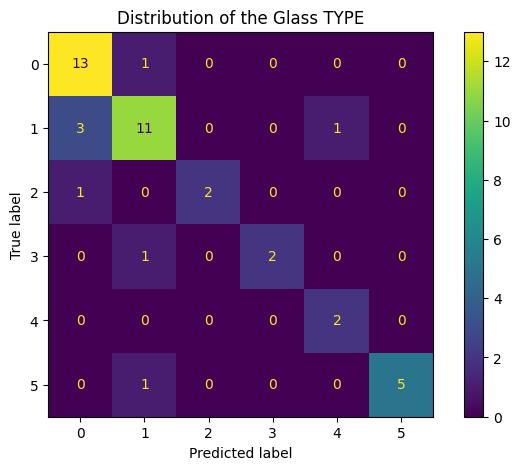

In [ ]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
)

cmp.plot(ax=ax)
plt.title("Confusion Matrix of the Glass TYPE");